In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import seaborn as sns

src = "https://covidtracking.com/api/states/daily"

In [2]:
def get_data(state):
    data = [s for s in requests.get(src).json()[::-1] if s['state'] == state]
    data[0]['death'] = data[0]['death'] if 'death' in data[0] else 0
    
    data = [{
        **d,
        'death': d['death'] if 'death' in d else 0
    } for d in data]

    data=[
        {
            **s,
            "deathIncreaseRate": 100 * (s['deathIncrease'] / data[i - 1]['deathIncrease'] - 1) if i > 0 and data[i - 1]['deathIncrease'] else 0,
            "positiveIncreaseRate": 100 * (s['positiveIncrease'] / data[i - 1]['positiveIncrease'] - 1) if i > 0 and data[i - 1]['positiveIncrease'] else 0,
            "totalTestResultsIncreaseRate": 100 * (s['totalTestResultsIncrease'] / data[i - 1]['totalTestResultsIncrease'] - 1) if i > 0 and data[i - 1]['totalTestResultsIncrease'] else 0,
        } for i,s in enumerate(data)]

    return pd.DataFrame(data, columns=data[0].keys())

[Text(0, 0, '-75%'),
 Text(0, 0, '-50%'),
 Text(0, 0, '-25%'),
 Text(0, 0, '0%'),
 Text(0, 0, '25%'),
 Text(0, 0, '50%'),
 Text(0, 0, '75%'),
 Text(0, 0, '100%'),
 Text(0, 0, '125%'),
 Text(0, 0, '150%')]

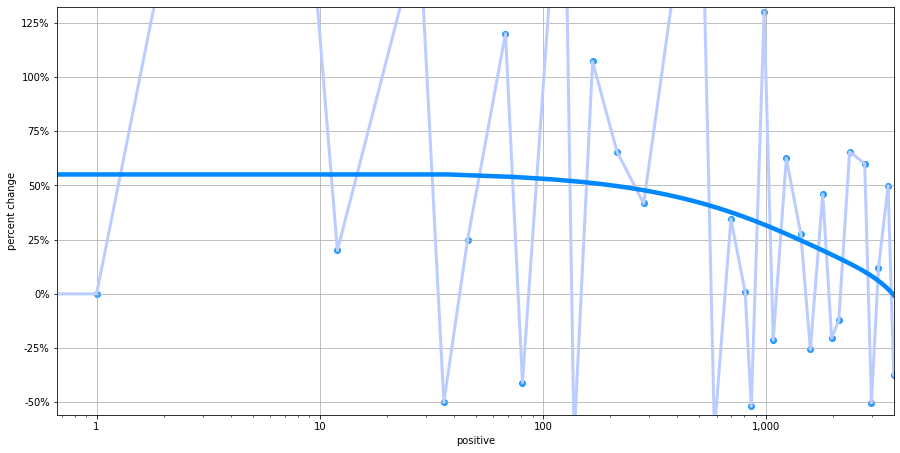

In [10]:
data = get_data('AL')

plt.figure(figsize=(15,7.5))
sns.set_context(rc={"lines.linewidth": 3})

plot = sns.lineplot(x="positive", y="positiveIncreaseRate", data=data, color="#BBCCFF", ci=None)
plot = sns.regplot(x="positive", y="positiveIncreaseRate", data=data, color="#0088FF", ci=None, order=3)

# plot = sns.lineplot(x="positive", y="deathIncreaseRate", data=data, color="#DDDDDD", ci=None)
# plot = sns.regplot(x="positive", y="deathIncreaseRate", data=data, color="#000000", ci=None, order=3)

# plot = sns.lineplot(x="positive", y="totalTestResultsIncreaseRate", data=data, color="#FFCCAA", ci=None)
# plot = sns.regplot(x="positive", y="totalTestResultsIncreaseRate", data=data, color="#FF8800", ci=None, order=3)

plot.set(ylabel='percent change', xscale="log")
plot.grid(True)

std = data['positiveIncreaseRate'].std()
mean = data['positiveIncreaseRate'].mean()

plot.set_ylim(mean - std, mean + std)

plot.set_xticklabels([f'{x:,.0f}' for x in plot.get_xticks()])
plot.set_yticklabels([f'{x:.0f}%' for x in plot.get_yticks()])
